In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
flower = datasets.load_iris()

import sklearn
print(sklearn.__version__)



0.23.1


In [25]:
#flower.head() #this display the list of some heading dataset from the table


In [2]:
type(flower) #type function gives the idea about the datasets, whether it is pandas datafame or dictinoary ot other

sklearn.utils.Bunch

In [3]:
print(flower.keys())   #.keys() is used to know the variables names used in the datasheet

X= flower.data
y= flower.target
df= pd.DataFrame (X, columns=flower.feature_names)
print(df.head())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
#X = flower[['sepal length', 'sepal width', 'petal length', 'petal width']]  #feature variable
#y = flower['species']                                                       # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)   #here if test_size is not mention then it is auto split into 75% training data and 25% test data
             #also random_state= 2 (can take any random state)


In [5]:
X_train.shape


(112, 4)

In [6]:
X_test.shape

(38, 4)

In [7]:
flower.data.shape

(150, 4)

# Creating a Classifier


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier (n_neighbors =5)


# Train the Classifier


In [71]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [10]:
knn.score(X_test, y_test)

0.9736842105263158

# Now predicting unseen data

In [135]:
X_new = np.array ([[5.6,2.8,3.9, 1.1], [10,12.3, 9, 6], [0.2, 1.2, 3.2, 1.1]])
prediction = knn.predict(X_new)

X_new.shape



(3, 4)

In [12]:
flower.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [136]:
print('The predicted new valeue is of:{}'.format(prediction))

The predicted new valeue is of:[1 2 0]


# Plottting Sepal Length and Sepal width of Different Flower types

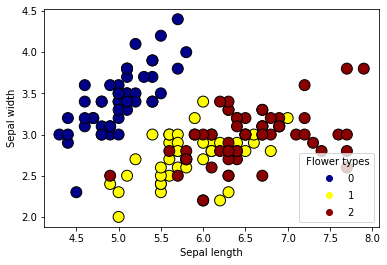

In [134]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

X = flower.data[:,:4] #choosing 4 features from the tables
Y= flower.target

give_color =ListedColormap(['darkblue','yellow','darkred' ])


scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=give_color, edgecolor='k', s=120)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

handles, labels = scatter.legend_elements(  prop ='colors')
plt.legend(handles, labels, loc='lower right', title = " Flower types")





# Plotting Petal width and Petal length

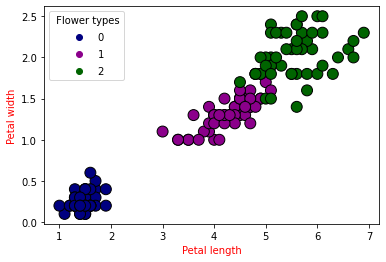

In [140]:
give_color1 =ListedColormap(['navy','darkmagenta','darkgreen' ])


scatter = plt.scatter(X[:, 2], X[:, 3], c=Y, cmap=give_color1, edgecolor='k', s=120)

plt.xlabel('Petal length', color ='red')
plt.ylabel('Petal width', color ='red')

handles, labels = scatter.legend_elements(  prop ='colors')
plt.legend(handles, labels, loc='upper left', title = " Flower types")

# Plotting all Feature Variables with Flowers types

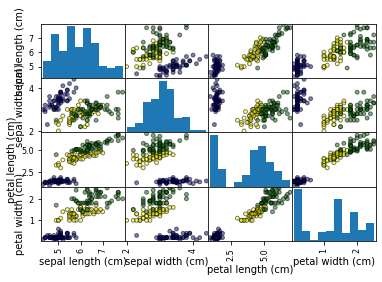

In [151]:
give_color2= ListedColormap(['navy','yellow','darkgreen'])
plots = pd.plotting.scatter_matrix(df, c=Y, cmap= give_color2, s=60, edgecolor ='k')